Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb
import pywt

Read the signal

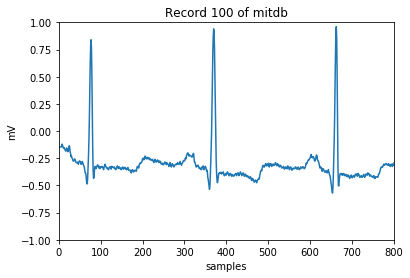

In [2]:
FILE= '100'
signals, fields= wfdb.rdsamp(FILE)
signal=signals[:,0]
plt.plot(signal)
plt.axis([0,800,-1,1])
plt.xlabel('samples')
plt.ylabel('mV')
plt.title('Record 100 of mitdb')
plt.show()

Perform stationary wavelet transform

In [3]:
N=240
PaddedSignal=np.pad(signal,(0,N), 'constant')

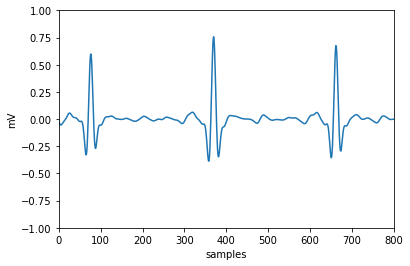

In [4]:
[(cA6, cD6), (cA5, cD5), (cA4,cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1)]= pywt.swt(PaddedSignal, 'sym6', level=6)
cA6=np.zeros(650240)
cD6=np.zeros(650240)
cA5=np.zeros(650240)
cA4=np.zeros(650240)
cA3=np.zeros(650240)
cD3=np.zeros(650240)
cA2=np.zeros(650240)
cD2=np.zeros(650240)
cA1=np.zeros(650240)
cD1=np.zeros(650240)
FilteredSignal= pywt.iswt([(cA6, cD6), (cA5, cD5), (cA4,cD4), (cA3, cD3), (cA2, cD2), (cA1, cD1)], 'sym6')
plt.plot(FilteredSignal)
plt.axis([0,800,-1,1])
plt.xlabel('samples')
plt.ylabel('mV')
plt.show()

Find Peaks in the signal

In [5]:
from Detect_Peaks import detect_peaks
AbsSignal=np.absolute(FilteredSignal)
Peaks=detect_peaks(AbsSignal, mph=0.3, mpd=120)
PeakAmp=signal[Peaks]

Plot the results

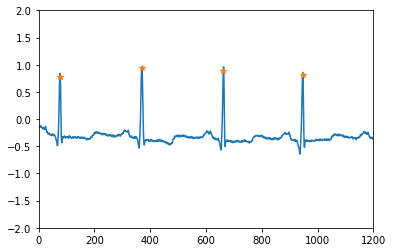

In [6]:
#%matplotlib notebook
plt.plot(signal)
plt.plot(Peaks, PeakAmp, '*')
plt.axis([0,1200,-2,2])
plt.show()

Evaluate performance

In [7]:
Annotations= wfdb.rdann('100','atr', return_label_elements=['symbol'])
#RealPeaks= wfdb.Annotation(record_name='100', extension='atr', symbol=['N', 'V', 'A'])
PeakSamples=Annotations.sample
PeakSymbols=Annotations.symbol
RealPeaksIndex=[]
for index, sym in enumerate(PeakSymbols):
    if sym == 'N' or sym == 'V' or sym=='A':
        RealPeaksIndex=np.append(RealPeaksIndex, index)
RealPeaksIndex= RealPeaksIndex.astype(int)
RealPeaks=PeakSamples[RealPeaksIndex]
#help(wfdb.Annotation)

In [8]:
TruePositive=[]
FalsePositive=[]
HitR=np.ones(len(RealPeaks), dtype= bool)
for indP, ValP in np.ndenumerate(Peaks):
    Hit=0
    for indR, ValR in np.ndenumerate(RealPeaks):
        if np.absolute(ValP-ValR) < 50:
            Hit=1
            HitR[indR[0]]=False
            TruePositive=np.append(TruePositive, indP[0])
            RealPeaks= RealPeaks[HitR]
            HitR=HitR[HitR]
            break
    if Hit==0:
        FalsePositive=np.append(FalsePositive, indP[0])
FalseNegative = len(HitR)
TruePositiveRate=len(TruePositive)/(len(TruePositive)+len(HitR))
PositivePredictiveValue=len(TruePositive)/(len(TruePositive)+len(FalsePositive))

In [9]:
print('True Positive Count: {0:5d}'.format(len(TruePositive)))
print('False Positive Count: {0:d}'.format(len(FalsePositive)))
print('False Negative Count: {0:d}'.format(len(HitR)))
print('TPR: {0:.3f}%'.format(TruePositiveRate*100))
print('PPV: {0:.3f}%'.format(PositivePredictiveValue*100))

True Positive Count:  2273
False Positive Count: 0
False Negative Count: 0
TPR: 100.000%
PPV: 100.000%
